In [2]:
from google.colab import files
import pandas as pd
import io

# Upload file manually
uploaded = files.upload()

# Get the actual filename from the uploaded dictionary
uploaded_filename = list(uploaded.keys())[0]

# Load dataset into a DataFrame, using the actual filename
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

# Display dataset info
print(df.info())
print(df.head())

Saving user_item_sparse_matrix.csv to user_item_sparse_matrix (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   User ID    1048575 non-null  int64  
 1   Item ID    1048575 non-null  int64  
 2   avg_score  1048575 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB
None
   User ID  Item ID  avg_score
0   171885        0   0.200584
1   169670        0   0.271320
2   131333        0   0.579901
3    23901        0   0.182193
4    56062        0   0.049333


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   User ID    1048575 non-null  int64  
 1   Item ID    1048575 non-null  int64  
 2   avg_score  1048575 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 24.0 MB


In [4]:
print(df.isnull().sum())


User ID      0
Item ID      0
avg_score    0
dtype: int64


In [5]:
print(df.head())  # Show first 5 rows


   User ID  Item ID  avg_score
0   171885        0   0.200584
1   169670        0   0.271320
2   131333        0   0.579901
3    23901        0   0.182193
4    56062        0   0.049333


In [6]:
print("Unique Users:", df['User ID'].nunique())
print("Unique Items:", df['Item ID'].nunique())


Unique Users: 187890
Unique Items: 39209


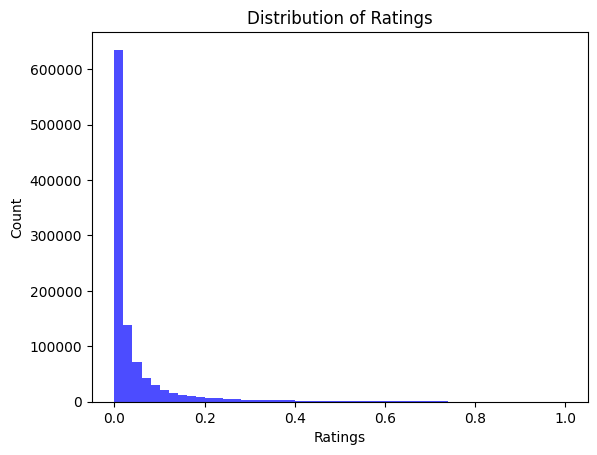

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['avg_score'], bins=50, color='blue', alpha=0.7)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [9]:
# Splitting into training (80%) and testing (20%)
# Remove stratify or use a column with sufficient samples per class
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42 #, stratify=df['User ID']
)

# Display the sizes of train and test sets
print("Training set size:", train_df.shape)
print("Testing set size:", test_df.shape)


Training set size: (838860, 3)
Testing set size: (209715, 3)


In [10]:
# Check if all users exist in training
train_users = set(train_df['User ID'])
test_users = set(test_df['User ID'])

missing_users = test_users - train_users
print("Users missing in training set:", len(missing_users))


Users missing in training set: 3609


In [11]:
train_df.to_csv("train_matrix.csv", index=False)
test_df.to_csv("test_matrix.csv", index=False)

print("Train-Test Split Completed! Files saved.")


Train-Test Split Completed! Files saved.
